# Aprendizaje Automático Proyecto Final
# Machine Learning aplicado al Rating de aplicaciones

Por Andrés Puente y Fran López-Bleda

El objetivo del proyecto es predecir tendrá alta putuación, si es mayor que 4.4, si una aplicación en función de los datos otorgados en Kaggle en este [enlace](https://www.kaggle.com/lava18/google-play-store-apps).

## Datos 
Los datos utilizados de los que nos proporcionaban los siguientes:
- App: Nombre de la aplicación)
- Reviews: Número de reviews
- Installs: Número de instalaciones
- Category: Categoría aplicación
- Price: Precio
- Rating: Putuación de la aplicación

Los cuales hemos transformado para luegos ser usados:
- NameSize_i: intervalo cerrado de 0 a 2 enteros, indica si un nombre es corto, no largo y largo.
- Installs_i: Entero del logaritmo de 10 de las instalaciones de la aplicación.
- Reviews_i: Entero del logaritmo de 10 de las reviews de la aplicación.
- Category_i: Número que identifica a la categoría de la aplicación
- Price_i: Entero que indica si la aplicación es gratis, barata o cara
- High_Rated: Booleano que indica si el Rating de la app es mayor que 4.4


## Distribución
Esto es la distribución de las aplicaciones que tienen alta puntuación y no.

<img src="High_rated and Low_rated.png">

Ahora la distribución en función de los datos

### Categoría 
<img src="comparison1.png">

Se puede ver que dependiendo de la categoría, si que afecta el que sea de alta puntuación, este valor lo tendremos en cuenta a la hora de crear los modelos de predicción

### Instalaciones 
<img src="comparison2.png">

Se puede ver que en función del número de instalaciones, si que afecta el que sea de alta puntuación, este valor lo tendremos en cuenta a la hora de crear los modelos de predicción

### Reviews 
<img src="comparison3.png">
Se puede ver que en función del número de reviews, si que afecta el que sea de alta puntuación, este valor lo tendremos en cuenta a la hora de crear los modelos de predicción

### Precio 
<img src="comparison4.png">
Se puede ver que el precio de la applicación, no afecta el que sea de alta puntuación, este valor no lo tendremos en cuenta a la hora de crear los modelos de predicción

### Tamaño del nombre 
<img src="comparison5.png">
Se puede ver que en función tamaño del nombre de la aplicación, no afecta el que sea de alta puntuación, este valor no lo tendremos en cuenta a la hora de crear los modelos de predicción

## Modelos de Predicción
### Regresión logistica
En regresión logística se han utilizado las operaciones ya conocidas, del cálculo del gradiente, sigmoide y coste, regularizados, para llegar a conseguir las thetas óptimas que nos permitan predecir con acierto, el **66.17%** basicamente, 2 de cada 3 acertará. El tiempo que ha llevado consigo la obtención de thetas óptimas ha sido de **0.77** segundos. No es un modelo muy fiable.

### Redes neuronales

Para las redes neuronales también hemos calculado sus respectivos métodos de derivada de la sigmoide, cálculo del gradiente a partir de la propagación hacia atrás, pasándole a cada nodo su respectivo error anterior. Para ello se crean casos de entrenamiento que se utilizarán en la propagación hacia atrás, lo cuál nos permitirá obtener, las thetas óptimas. Decepcionantemente la precisión de la red neuronal deja mucho que desear con una precisión del **61.26%** en un tiempo de **1.7** segundos. No es un modelo fiable.

### Support Vector Machine
Para este modelo hemos usado la librería sklearn, tal y como hicimos en las práctica 6.
#### Linear
Con el SVM linear, usando la librería sklearn, hemos obtenido una precisión del **65.17%**, en un tiempo de **1.74** segundos. No es un modelo fiable. 
#### Gaussiano
Con el SVM Gaussiano, usando la librería sklearn, hemos obtenido una precisión del **67.47%**, en un tiempo de **1.84** segundos. No es un modelo fiable, pero parece ser el más fiable de todos.

### Comparación
<img src="ComparaciondeEficiencia.png">

## Conclusión
A la hora de intentar predecir el rating que tendrá una aplicación en función de los datos que nos aporta el Google Play store, no son muy certeros, aunque es también complicado acertar de está forma. Lo que afecta más al Rating, o si tendrá una alta puntuación, es el número de reviews, aunque en varios casos, al menos en este dataset, el número de reviews también tiene que ver con reviews que puntúan mal a las aplicaciones.
También las categorías afectan algo, pero tampoco mucho, ya que hay categorías que la distribución no indica si tendrá alta puntuación.

## Anexo

In [118]:
import pandas as pd
import time
from pandas import DataFrame
from pandas.io.parsers import read_csv
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
import datetime
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

## Transformacion de datos

In [119]:
#----------------------------------------
# Inicio transformación de datos
#----------------------------------------

#----------------------------------------
#Transformacion y limpieza del tamaño de instalacion
def sizes_trans(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
#-----------------------------------------
#Transformacion del número de descargas(Installs)
def installs_trans(inst):
    try:
        x = (inst[:-1].replace(",",""))
        x = int(x)
        #return x
    except ValueError:
        print("Line is corrupt!", x)
        x = 0
    return (x)

#----------------------------------------
def rating_bynary_trans(rate):
    if rate < 4.4:
        return 0
    else:
        return 1

#----------------------------------------
#Transformacion del Tipo de app(Free/No Free) a binario
def type_trans(types):
    if types == 'Free':
        return 0
    else:
        return 1

#----------------------------------------
#Transformar Fecha a numero (last update)
def date_trans(date_str):
    date_time_obj = datetime.datetime.strptime(date_str, '%B %d, %Y')
    return date_time_obj.timestamp()


#----------------------------------------
#Transformacion de los precios a int
def price_trans(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        if price == "veryone":
            price = 0
        price = float(price)
        return price
    
def price_i_trans(price):
    if price > 5:
        return 2
    if price > 0:
        return 1
    return 0

    
#----------------------------------------
#Transformacion de las reviews a float
def review_trans(rev):
    if 'M' in rev:
        x = rev[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == rev[-1:]:
        x = rev[:-1]
        x = float(x)*1000
        return (x)
    else:
        return (float(rev))
    
#----------------------------------------

#----------------------------------------
#Transformacion del tamaño del nombre
def name_size_trans(name):
    nameS = len(name)
    if nameS < 7:
        return 0
    if nameS < 15:
        return 1
    return 2
    
#----------------------------------------
def transform_data(data):
    #Rellenando los vacios
    data.Size.fillna(method = 'ffill', inplace = True)
    
    #Rating
    data["High_Rated"] = data["Rating"].map(rating_bynary_trans)
    
    #Transformacion de las categorias a int
    CategoryString = data["Category"]
    categoryVal = data["Category"].unique()
    categoryValCount = len(categoryVal)
    category_dict = {}
    for i in range(0, categoryValCount):
        category_dict[categoryVal[i]] = i
    data["Category_i"] = data["Category"].map(category_dict).astype(int)
    
    
    
    #Tamaño de instals
    data["Size"] = data["Size"].map(sizes_trans)
    
    #data["Size_i"] = np.floor(np.log10(data["Size"])).astype(int)
    
    #Installs
    data["Installs"] = data["Installs"].map(installs_trans)
    
    data["Installs_i"] = np.floor(np.log10(data["Installs"])).astype(int)
    
    #Transformacion del "Content Rating" a enteros por cada valor unico
    RatingL = data["Content Rating"].unique()
    RatingDict = {}
    for i in range(len(RatingL)):
        RatingDict[RatingL[i]] = i
    data["Content Rating"] = data["Content Rating"].map(RatingDict).astype(int)
    
    data["NameSize_i"]= data["App"].map(name_size_trans).astype(int)
    
    #Free/No free
    data["Type"] = data["Type"].map(type_trans)
    
    #Last update
    data["Last Updated"] = data["Last Updated"].map(date_trans).astype(float)
    
    #Precios
    data["Price"] = data["Price"].map(price_trans).astype(float)
    
    data["Price_i"] = data["Price"].map(price_i_trans).astype(int)
    
    #Reviews
    data["Reviews"] = data["Reviews"].map(review_trans).astype(float)
    data["Reviews_i"] = np.floor(np.log10(data["Reviews"])).astype(int)
    
    
    #Eliminando los parametros que no utilizaremos ya que no son relevantes
    data.drop(labels = ['Last Updated', 'App', 'Genres', 'Rating', 'Type', 'Content Rating',
                       'Current Ver', 'Android Ver'], axis = 1, inplace = True)
    
    return data
# -----------------------------
# Fin transformación de datos
# -----------------------------

In [120]:
d = read_csv('data/googleplaystore.csv')
d = d.dropna()

d = transform_data(d)
d = d.reset_index(drop=True)

#Aquí guardaremos los tiempos para mostrar en la gráfica final. Tamaño 4, ya que son
#los 4 modelos diferentes que tenemos
models_times = np.arange(4, dtype = float)

d.head()

,Category,Reviews,Size,Installs,Price,High_Rated,Category_i,Installs_i,NameSize_i,Price_i,Reviews_i
0,ART_AND_DESIGN,159.0,19000000.0,10000,0.0,0,0,4,2,0,2
1,ART_AND_DESIGN,967.0,14000000.0,500000,0.0,0,0,5,2,0,2
2,ART_AND_DESIGN,87510.0,8700000.0,5000000,0.0,1,0,6,2,0,4
3,ART_AND_DESIGN,215644.0,25000000.0,50000000,0.0,1,0,7,2,0,5
4,ART_AND_DESIGN,967.0,2800000.0,100000,0.0,0,0,5,2,0,2


In [121]:
dataRate = d['High_Rated']
dataRating = DataFrame(dataRate)
dataRating.columns = ['High_Rated']

In [122]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 11 columns):
Category      9360 non-null object
Reviews       9360 non-null float64
Size          7723 non-null float64
Installs      9360 non-null int64
Price         9360 non-null float64
High_Rated    9360 non-null int64
Category_i    9360 non-null int32
Installs_i    9360 non-null int32
NameSize_i    9360 non-null int32
Price_i       9360 non-null int32
Reviews_i     9360 non-null int32
dtypes: float64(3), int32(5), int64(2), object(1)
memory usage: 621.7+ KB


## Lectura de datos

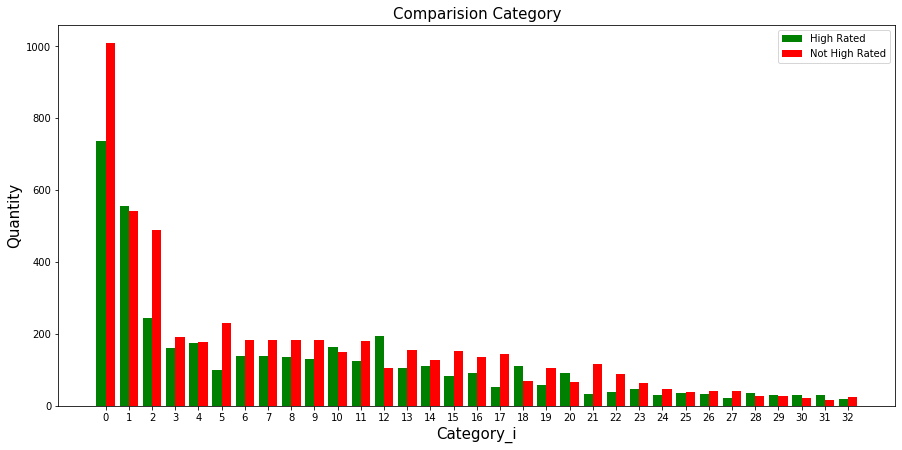

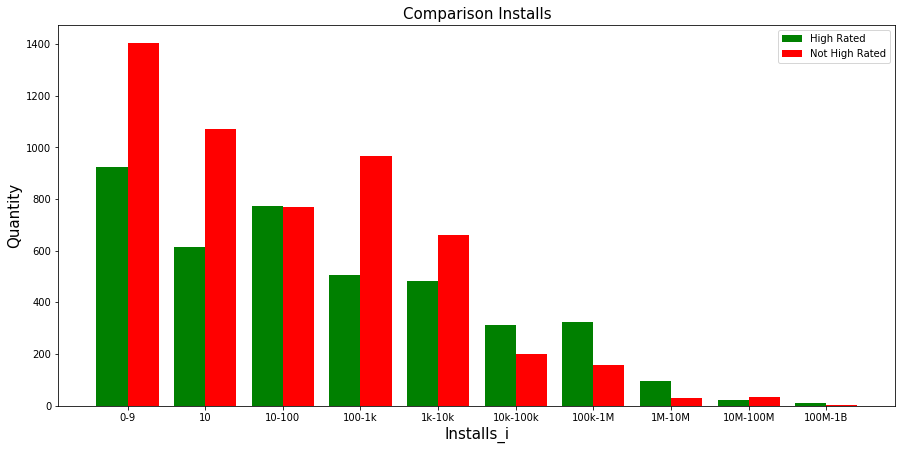

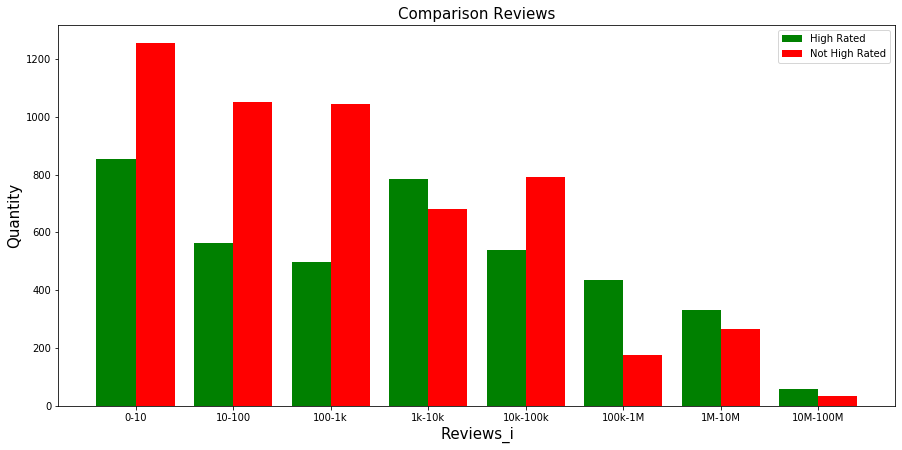

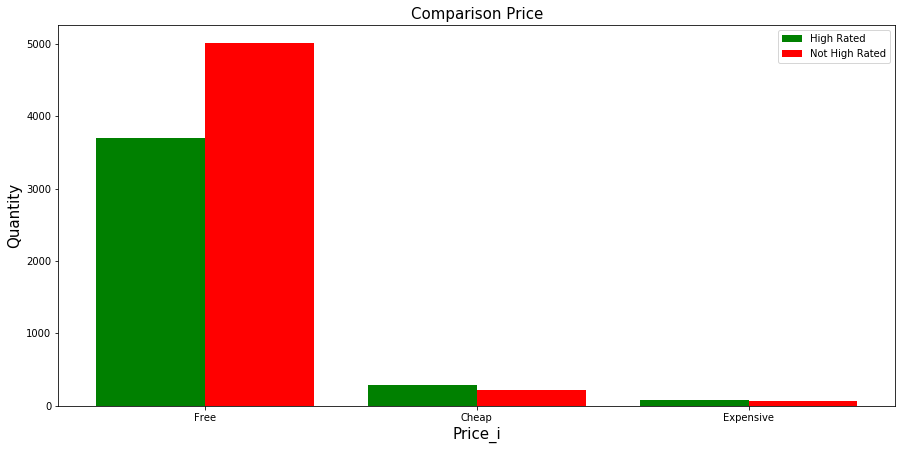

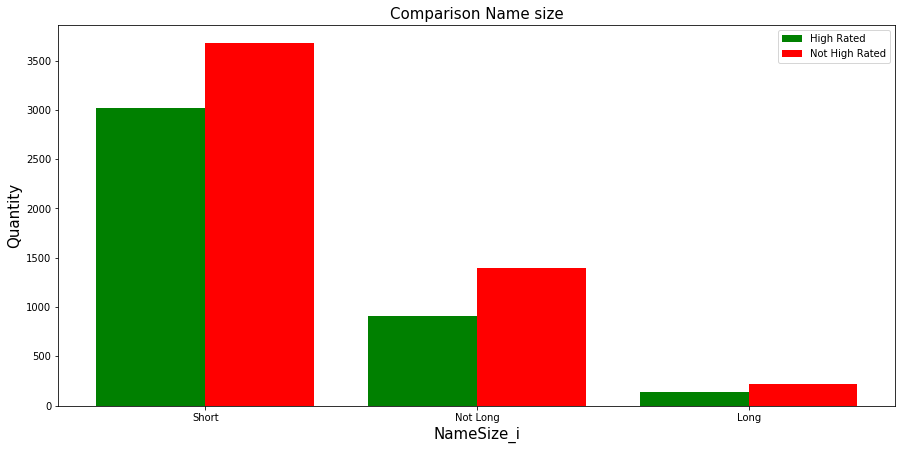

In [123]:
i = 0
def drawCompareGraphic(feature, title, ticklabels):
    global i
    shape_cap = d[feature].value_counts()
    shape_labels = shape_cap.axes[0].tolist()

    inde = np.arange(len(shape_labels))

    lowRatedShape = []
    highRatedShape = []

    for shape in shape_labels:
        quantity = len(d[d[feature] == shape].index)
        highRated = len(d[(d[feature] == shape) & (d['High_Rated'] == 1)].index)
        highRatedShape.append(highRated)
        lowRatedShape.append(quantity-highRated)

    ancho = 0.4
    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(inde, highRatedShape, ancho, color='green')
    ax.bar(inde+ancho, lowRatedShape, ancho, color='red')

    ax.set_xlabel(feature, fontsize = 15)
    ax.set_ylabel('Quantity',fontsize=15)  
    ax.set_title(title,fontsize=15)
    ax.set_xticks(inde+ancho/2)
    ax.set_xticklabels(ticklabels, fontsize=10)
    ax.legend(['High Rated', 'Not High Rated'])
    i = i + 1
    plt.savefig('comparison' + str(i) + '.png')
    
    
drawCompareGraphic('Category_i', 'Comparision Category', d["Category_i"].unique())

drawCompareGraphic('Installs_i', 'Comparison Installs', ['0-9','10', '10-100', '100-1k', '1k-10k', '10k-100k',
                                                          '100k-1M' ,'1M-10M' ,'10M-100M', '100M-1B'])

drawCompareGraphic('Reviews_i', 'Comparison Reviews', ['0-10', '10-100', '100-1k', '1k-10k', '10k-100k',
                                                          '100k-1M' ,'1M-10M' ,'10M-100M', '100M-1B'])

drawCompareGraphic('Price_i', 'Comparison Price', ['Free','Cheap','Expensive'])

drawCompareGraphic('NameSize_i', 'Comparison Name size', ['Short','Not Long','Long'])

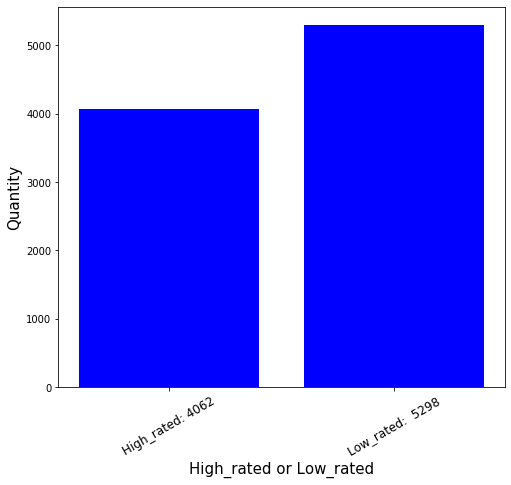

In [124]:
#Representamos la cantidad de muestras de ejmplo que son high_rated o low_rated a nivel gloval
highRated = []
lowRated = []

for cl in d["High_Rated"]:
    if cl==0:
        lowRated.append(cl)
    else:
        highRated.append(cl)

xBars = ['High_rated: ' + str(len(highRated)), 'Low_rated:  ' + str(len(lowRated))]        
ancho = 0.8
fig, ax = plt.subplots(figsize=(8,7))
index = np.arange(len(xBars))
plt.bar(index, [len(highRated), len(lowRated)], ancho, color='blue')
plt.xlabel('High_rated or Low_rated', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.xticks(index, xBars, fontsize=12, rotation=30)
plt.savefig('High_rated and Low_rated.png')
#Mayor número de muestras comestibles que venenosas, como se puede observar en la gráfica

In [125]:
d.drop(labels = ['Price_i','NameSize_i','Category', 'Reviews', 'Size', 'Installs', 'Price'], axis = 1, inplace = True)

d.head()

,High_Rated,Category_i,Installs_i,Reviews_i
0,0,0,4,2
1,0,0,5,2
2,1,0,6,4
3,1,0,7,5
4,0,0,5,2


In [126]:
labelEncode = preprocessing.LabelEncoder()

#YArr = d['High_Rated'].array
YArr = labelEncode.fit_transform(dataRate.values.ravel())

print(len(YArr))

9360


In [127]:
d.drop(labels = ['High_Rated'], axis = 1, inplace = True)

In [128]:
dataFeat = DataFrame(d)

#print(dataFeat)
XArr = pd.get_dummies(dataFeat.astype(str)).values

print(len(XArr))

9360


In [131]:
#RegresionLogistica(d)

m = len(YArr)

#La función sigmoide es la función h, la hipótesis
def sigmoide(value):
    s = 1/(1+np.exp(-value))
    return s

#FUNCIÓN DE COSTE
def coste(O, X, Y):
    H = sigmoide(np.dot(X,O))
    logH = np.log(H)
    logHT = logH.T
    logAux = np.log((1- H))
    logAuxT = logAux.T
    YT = Y.T
    suma = (-1/m)* (np.dot(YT, logH) + np.dot((1-YT), logAux))
    return suma
    
#FUNCIÓN DE GRADIENTE
def gradiente(O, X, Y):
    return (X.T.dot((sigmoide(X.dot(O))) - Y))/m

#FUNCIÓN DE COSTE REGULARIZADA (lambda)
def coste2(O, X, Y, lam):
    sol = (coste(O, X, Y) + (lam/(2*m))*(O**2).sum())
    return sol
   
#FUNCIÓN DE GRADIENTE REGULARIZADA (lambda)
def gradiente2(O, X, Y, lam):
    AuxO = np.hstack([np.zeros([1]), O[1:,]])
    return (((X.T.dot(sigmoide(X.dot(O))-Y))/m) + (lam/m)*O)

#---------------------------------------------

X = XArr.copy()
X = np.insert(X, 0, 1, axis = 1)

start = time.time()
thetas = np.ones(len(X[0]))
result = opt.fmin_tnc(func = coste2, x0 = thetas, fprime = gradiente2, args = (X, YArr, 0.1))
thetas_opt = result[0]
end = time.time()
print("EXE TIME:", end - start, "seconds")
print("OPT THETAS:\n", thetas_opt)


#Evaluación de los resultados obtenidos en las predicciones con las thetas óptimas
def evalua(thetas, X, y):
    thetasMat = np.matrix(thetas)   
    z = np.dot(thetasMat,X.transpose())
    resultados = sigmoide(z)
    resultados[resultados >= 0.5] = 1
    resultados[resultados < 0.5] = 0
    admitidosPred = sum(np.where(resultados == y)).shape[0]
    return (admitidosPred / len(y)) * 100
prediction = evalua(thetas_opt, X, YArr)
models_times[0] = (prediction)
print(models_times)
print("PREDICTIONS RESULT:",prediction)

EXE TIME: 0.7711734771728516 seconds
OPT THETAS:
 [ 0.68052003  0.83626748  0.2932394   0.97125368 -0.02744171  0.03087177
  0.79656139  0.06480681 -0.07066991 -0.01375933 -0.17559643 -0.1125971
  0.28500734  0.44844377 -0.49029482 -0.01816892 -0.31083175 -0.19356623
 -0.12056904 -0.43642326  0.23304242 -0.08411412  1.26835674  0.09162618
  0.79373286 -0.40061772 -0.36748064 -0.6268274  -0.0962571   0.41414025
 -1.05879872 -0.84133238  0.63537634 -1.1696656   3.88993914  3.13099364
  2.29697859  1.22615483  0.36401046 -0.46616616 -1.51739388 -2.09571594
 -2.29823835 -3.34345458 -2.54341829 -2.19602116 -1.67272665 -0.72026474
  0.51922539  1.61451845  2.78753897  2.98572237]
[66.17521368  1.          2.          3.        ]
PREDICTIONS RESULT: 66.17521367521367


## Red Neuronal

In [132]:
# ------------------------------
# Red Neuronal
# ------------------------------

from scipy.optimize import minimize as sciMin
from scipy.io import loadmat

lambda_ = 1
    
def load_csv(dataFile):
    y = dataFile['High_Rated'].array
    dataFile = dataFile.drop(['High_Rated'], axis = 1).values
    return dataFile, y
    
def g(z):
    """
    1/ 1 + e ^ (-0^T * x)
    """
    return 1/(1 + np.exp(-z))
    
def derivada_de_G(z):
    result = g(z) * (1 - g(z))
    return result
    
def pesos_aleat(L_in, L_out):
    pesos = np.random.uniform(-0.12, 0.12, (L_out, 1+L_in))

    return pesos
    
def transform_y(y, num_etiquetas):
    #y = np.reshape(y, (np.shape(y)[0], 1))
    mask = np.empty((num_etiquetas, np.shape(y)[0]), dtype=bool)
    for i in range( num_etiquetas):
        mask[i, :] = ((y[:, 0] + num_etiquetas - 1) % num_etiquetas == i) 
        #codificado con el numero 1 en la posicion 0 y el numero 0 en la posicion 9

    mask = mask * 1

    return np.transpose(mask)
    
def J(X, y, a3, num_etiquetas, theta1, theta2):
    m = np.shape(X)[0]
    aux1 = -y * (np.log(a3))
    aux2 = (1 - y) * (np.log(1 - a3))
    aux3 = aux1 - aux2
    aux4 = np.sum(theta1**2) + np.sum(theta2**2)
    #print (aux4)
    return (1/m) * np.sum(aux3) + (lambda_/(2*m)) * aux4
    
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    a1 = np.hstack([np.ones([m, 1]), X])
    z2 = np.dot(a1, theta1.T)
    a2 = np.hstack([np.ones([m, 1]), g(z2)])
    z3 = np.dot(a2, theta2.T)
    h = g(z3)
    return a1, z2, a2, z3, h
    
def add_column_left_of_matrix(matrix):
        new_matrix = np.hstack([np.ones([np.shape(matrix)[0], 1]), matrix]) #convention in linear regr
        return new_matrix
    
def propagation(a1, theta1, theta2):
    a1 = add_column_left_of_matrix(a1)
    a2 = g(np.dot(a1, np.transpose(theta1)))      
    a2 = add_column_left_of_matrix(a2)
    a3 = g(np.dot(a2, np.transpose(theta2)))

    return a1, a2, a3

    
def backdrop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    """
    return coste y gradiente de una red neuronal de dos capas
    """
    theta1 = np.reshape(params_rn[:num_ocultas*(num_entradas + 1)], 
        (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1):], 
        (num_etiquetas, (num_ocultas + 1)))

    #--------------------PASO1---------------------------------------
    
    a1, a2, a3 = propagation(X, theta1, theta2)
    m = np.shape(X)[0]
    delta_3 = a3 - y # (5000, 10)
    #--------------------PASO2---------------------------------------
    #delta_3 = a3 - y # (5000, 10)
    delta_matrix_1 = np.zeros(np.shape(theta1))
    delta_matrix_2 = np.zeros(np.shape(theta2))

    aux1 = np.dot(delta_3, theta2) #(5000, 26)
    aux2 = add_column_left_of_matrix(derivada_de_G(np.dot(a1, np.transpose(theta1))))
    delta_2 = aux1 * aux2 #(5000, 26)
    delta_2 = np.delete(delta_2, [0], axis=1) #(5000, 25)

    # #--------------------PASO4---------------------------------------

    delta_matrix_1 = delta_matrix_1 + np.transpose(np.dot(np.transpose(a1), delta_2)) #(25, 401)
    delta_matrix_2 = delta_matrix_2 + np.transpose(np.dot(np.transpose(a2), delta_3)) #(10, 26)
    #--------------------PASO6---------------------------------------
    delta_matrix_1 = (1/m) * delta_matrix_1
    delta_matrix_1[:, 1:] = delta_matrix_1[:, 1:] + (reg/m) * theta1[:, 1:] 

    delta_matrix_2 = (1/m) * delta_matrix_2
    delta_matrix_2[:, 1:] = delta_matrix_2[:, 1:] + (reg/m) * theta2[:, 1:] 


    cost = J(X, y, a3, num_etiquetas, theta1, theta2)
    gradient = np.concatenate((np.ravel(delta_matrix_1), np.ravel(delta_matrix_2)))

    return cost, gradient
    
def checkLearned(y, outputLayer):     
    checker = (outputLayer > 0.7) 
    count = np.size(np.where(checker[:, 0] == y[:, 0])) 
    fin = count/np.shape(y)[0] * 100
    return fin, checker

def RedNeuronal(data):
    #X, y = load_csv(data)
    #X = np.array(X)
    #y = np.array(y)
    #y = np.reshape(y, (np.shape(y)[0], 1))
        
    X = XArr.copy()
    y = YArr.copy()
    y = np.reshape(y, (np.shape(y)[0], 1))

    # ------------------------------
    legendPos = np.where(y == 1)
    legendX = X[legendPos[0]]

    normiePos = np.where(y == 0)
    normieX = X[normiePos[0]]
    # ------------------------------

    num_entradas = np.shape(X)[1]
    num_ocultas = 25
    num_etiquetas = 1

    theta1 = pesos_aleat(num_entradas, num_ocultas)
    theta2 = pesos_aleat(num_ocultas, num_etiquetas)
    
    
    theta_vector = np.concatenate((np.ravel(theta1), np.ravel(theta2)))
    start = time.time()
    thetas = sciMin(fun=backdrop, x0=theta_vector,
    args=(num_entradas, num_ocultas, num_etiquetas, X, y, lambda_),
    method='TNC', jac=True,
    options={'maxiter': 70}).x
    end = time.time()

    theta1 = np.reshape(thetas[:num_ocultas*(num_entradas + 1)], 
            (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(thetas[num_ocultas*(num_entradas + 1):], 
            (num_etiquetas, (num_ocultas + 1)))
    a, c = checkLearned(y, forward_propagate(X, theta1, theta2)[4])

    #b = c
    print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
    
    print("Precision de la red neuronal: " + str(a) + " %")
    models_times[1] = a

In [133]:
RedNeuronal(d)


 TRAINING EXECUTION TIME: 1.68037748336792 seconds
Precision de la red neuronal: 61.912393162393165 %


In [134]:
XSvm = XArr.copy()
YSvm = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvm, YSvm, test_size=0.33, random_state=42)

#SVM de tipo lineal
svmLineal = svm.SVC(C=1, kernel='linear')

#Entrenamiento de las "redes". Similar a buscar las thetas óptimas
start = time.time()
print("\n TRAINING STARTED")
svmFitted = svmLineal.fit(X_Train, Y_Train)
end = time.time()
print("\n TRAINING FINISHED")
print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
#predecimos Y a partir de la x "entrenada"
predictY = svmLineal.predict(X_test)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1
    return (numAciertos/(len(Y_test)))*100

success = evalua(predictY, Y_test)
models_times[2] = success
print("\nPREDICTIONS SVM LINEAL",success)


 TRAINING STARTED

 TRAINING FINISHED

 TRAINING EXECUTION TIME: 1.4513278007507324 seconds

PREDICTIONS SVM LINEAL 65.36095823891227


In [135]:
XSvmG = XArr.copy()
YSvmG = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvmG, YSvmG, test_size=0.33, random_state=42)

C=1
sigma = 0.1
svmGauss = svm.SVC(C = C, kernel = 'rbf', gamma = 1/(2*sigma **2))

start = time.time()
print("\n TRAINING STARTED")
svmGaussFitted = svmGauss.fit(X_Train, Y_Train)
end = time.time()
print("\n TRAINING FINISHED")
print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
predictY = svmGauss.predict(X_test)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1
    return (numAciertos/(len(Y_test)))*100

success = evalua(predictY, Y_test)
models_times[3] = success
print("\nPREDICTIONS SVM GAUSS",success)


 TRAINING STARTED

 TRAINING FINISHED

 TRAINING EXECUTION TIME: 1.623363971710205 seconds

PREDICTIONS SVM GAUSS 67.076723858854


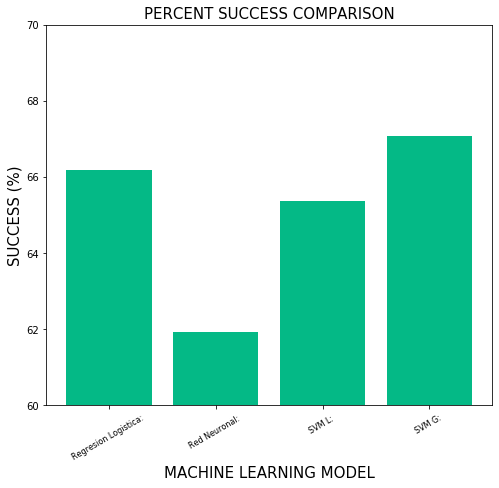

In [137]:
xBars = ['Regresion Logistica: ', 
         'Red Neuronal: ', 
         'SVM L: ', 
         'SVM G: ' ]
ancho = 0.8
fig, ax = plt.subplots(figsize=(8,7))
index = np.arange(len(xBars))
plt.bar(index, [models_times[0], models_times[1], models_times[2], models_times[3]], ancho, color='#04B986')
plt.xlabel('MACHINE LEARNING MODEL', fontsize=15)
plt.ylabel('SUCCESS (%)', fontsize=15)
plt.xticks(index, xBars, fontsize=8, rotation=30)
plt.title('PERCENT SUCCESS COMPARISON', fontsize=15)
plt.ylim((60, 70))
plt.savefig('ComparaciondeEficiencia.png')